In [27]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%pylab inline
import os
from __future__ import print_function
from __future__ import division
import os, sys
# hook up all scripts
sys.path.append(os.path.abspath('../scripts')) # if notebook in folder
sys.path.append(os.path.abspath('./scripts')) #if in root
import preprocessing_time_series as pts


os.chdir(pts.working_dir())

Populating the interactive namespace from numpy and matplotlib


``` bash
sudo python preprocessing_time_series.py
```

In [28]:
data_train = pd.read_csv('Feature_releases/release_v01/train_NAYARIT.csv')
print(data_train.shape)
data_train.head()

(809684, 24)


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,...,No_remains,Venta_hoy_by_uni,Ordered,Log_Demanda,Median_Producto_ID,LogMean_Producto_ID,Median_Producto_ID_Ruta_SAK,LogMean_Producto_ID_Ruta_SAK,Median_Producto_ID_Cliente_ID_Agencia_ID,LogMean_Producto_ID_Cliente_ID_Agencia_ID
0,3,1340,1,1051,41849,73,1,21.32,0,0.0,...,0,21.32,1,0.693147,2.0,1.118843,2.0,1.122955,1.0,0.774240
1,3,1340,1,1051,41849,1109,6,90.06,0,0.0,...,0,15.01,1,1.945910,2.0,1.171162,3.0,1.416386,6.0,1.805732
2,3,1340,1,1051,41849,1125,13,124.80,0,0.0,...,0,9.60,1,2.639057,6.0,1.971653,6.0,2.024443,9.5,2.042122
3,3,1340,1,1051,41849,1150,1,13.96,0,0.0,...,0,13.96,1,0.693147,2.0,1.448213,2.5,1.471629,2.0,1.080011
4,3,1340,1,1051,41849,2233,4,79.76,0,0.0,...,0,19.94,1,1.609438,3.0,1.409244,3.0,1.517772,3.0,1.399732


In [29]:
town = pts.text_encoding(pts.town_preproc())
agencies = set(town.loc[town.State == u'NAYARIT'].index)
len(agencies)

Data endoded


10

In [30]:
data_test = pd.read_csv('test.csv', index_col=0)
data_test = data_test.loc[data_test.Agencia_ID.isin(agencies), :]
print(data_test.shape)
data_test.head()

(78819, 6)


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
id,,,,,,
42,11,1378,1,2005,594640,43285
59,10,1359,11,3957,2068213,6469
129,10,1378,1,2101,905734,37577
183,11,1340,1,2065,325592,43285
203,11,1340,1,2052,7729188,43274


In [31]:
data = pd.concat([data_train, data_test], axis=0)
del data_train
del data_test

In [32]:
data = pts.lag_generation(data, n_lags=5)
data = data.drop([u'Town', u'State', u'Venta_uni_hoy', u'Venta_hoy', u'Dev_uni_proxima',
       u'Dev_proxima', u'Demanda_uni_equil', u'Dev_proxima_by_uni', u'No_remains', 
        u'Venta_hoy_by_uni', u'Ordered',u'Median_Producto_ID',
       u'LogMean_Producto_ID', u'Median_Producto_ID_Ruta_SAK',
       u'LogMean_Producto_ID_Ruta_SAK',
       u'Median_Producto_ID_Cliente_ID_Agencia_ID',
       u'LogMean_Producto_ID_Cliente_ID_Agencia_ID'], axis=1).set_index(u'Semana', append=True)
data = data.swaplevel(i=0, j=-1, axis=0)
data.head()

1 lag done
2 lag done
3 lag done
4 lag done
5 lag done


Agencia_ID  Canal_ID  Cliente_ID  Log_Demanda  Producto_ID  \
Semana                                                                 
3      0        1340         1       41849     0.693147           73   
       1        1340         1       41849     1.945910         1109   
       2        1340         1       41849     2.639057         1125   
       3        1340         1       41849     0.693147         1150   
       4        1340         1       41849     1.609438         2233   

          Ruta_SAK  Venta_uni_hoy_1  Venta_hoy_1  Dev_uni_proxima_1  \
Semana                                                                
3      0      1051              NaN          NaN                NaN   
       1      1051              NaN          NaN                NaN   
       2      1051              NaN          NaN                NaN   
       3      1051              NaN          NaN                NaN   
       4      1051              NaN          NaN                NaN   

          Dev_proxima_1                     ...                       \
Semana                                      ...                        
3      0            NaN                     ...                        
       1            NaN                     ...                        
       2            NaN                     ...                        
       3            NaN                     ...                        
       4            NaN                     ...                        

          No_remains_5  Venta_hoy_by_uni_5  Ordered_5  Log_Demanda_5  \
Semana                                                                 
3      0           NaN                 NaN        NaN            NaN   
       1           NaN                 NaN        NaN            NaN   
       2           NaN                 NaN        NaN            NaN   
       3           NaN                 NaN        NaN            NaN   
       4           NaN                 NaN        NaN            NaN   

          Median_Producto_ID_5  LogMean_Producto_ID_5  \
Semana                                                  
3      0                   NaN                    NaN   
       1                   NaN                    NaN   
       2                   NaN                    NaN   
       3                   NaN                    NaN   
       4                   NaN                    NaN   

          Median_Producto_ID_Ruta_SAK_5  LogMean_Producto_ID_Ruta_SAK_5  \
Semana                                                                    
3      0                            NaN                             NaN   
       1                            NaN                             NaN   
       2                            NaN                             NaN   
       3                            NaN                             NaN   
       4                            NaN                             NaN   

          Median_Producto_ID_Cliente_ID_Agencia_ID_5  \
Semana                                                 
3      0                                         NaN   
       1                                         NaN   
       2                                         NaN   
       3                                         NaN   
       4                                         NaN   

          LogMean_Producto_ID_Cliente_ID_Agencia_ID_5  
Semana                                                 
3      0                                          NaN  
       1                                          NaN  
       2                                          NaN  
       3                                          NaN  
       4                                          NaN  

[5 rows x 86 columns]

In [33]:
X_train = data.loc[~data.Log_Demanda.isnull(),:].drop('Log_Demanda', axis=1)
y_train = data.loc[~data.Log_Demanda.isnull(),'Log_Demanda']
X_eval = data.loc[data.Log_Demanda.isnull(),:].drop('Log_Demanda', axis=1)

In [34]:
import crossval

cv5fold, strats = crossval.crossvalidation(X_train[['Canal_ID']])
strats.value_counts()

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


1     761186
4      27504
11     16058
2       4646
5        286
6          4
dtype: int64

# Random Forest

In [35]:
def plot_feature_importances(rf, feat_labels): 
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(15, 9))
    plt.title('RF Feature Importances')
    plt.bar(range(len(feat_labels)), 
            importances[indices],
            color='lightblue', 
            align='center')


    plt.xticks(range(len(feat_labels)), feat_labels[indices], rotation=90)
    plt.xlim([-1, len(feat_labels)])
    plt.tight_layout()
#     plt.savefig('./rf_feature_importance.png', dpi=300)
    plt.show()

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_score
rf = RandomForestRegressor(n_estimators=3, criterion='mse', n_jobs=-1, verbose=10)

scores = cross_val_score(rf, X_train.fillna(-999), 
                         y_train,
                scoring = 'mean_squared_error', cv = cv5fold, n_jobs=-1)
rf.fit(X_train.fillna(-999), y_train)

building tree 1 of 3
building tree 1 of 3
 building tree 2 of 3
 building tree 3 of 3
 building tree 2 of 3
building tree 3 of 3
 building tree 3 of 3
building tree 1 of 3
 building tree 2 of 3
building tree 1 of 3
 building tree 2 of 3
 building tree 3 of 3


[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.7min remaining:  -25.9s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.7min remaining:  -25.4s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.7min remaining:  -25.5s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.7min remaining:  -26.1s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.2s remaining:   -0.1s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.3s remaining:   -0.1s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.2s remaining:   -0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.8min remaining:  -26.4s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.3s remaining:   -0.1s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.3s fi

building tree 1 of 3
 building tree 2 of 3
 building tree 3 of 3


[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.9min remaining:  -27.8s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.9min remaining:  -27.8s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.1s remaining:   -0.0s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.1s remaining:   -0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:   24.8s remaining:   -6.2s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:   25.2s remaining:   -6.3s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.2s finished
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.1s remaining:   -0.0s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.1s remaining:   -0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s finished


building tree 1 of 3
 building tree 3 of 3building tree 2 of 3



[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:   33.0s remaining:   -8.3s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:   33.3s remaining:   -8.3s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=3, n_jobs=-1, oob_score=False, random_state=None,
           verbose=10, warm_start=False)

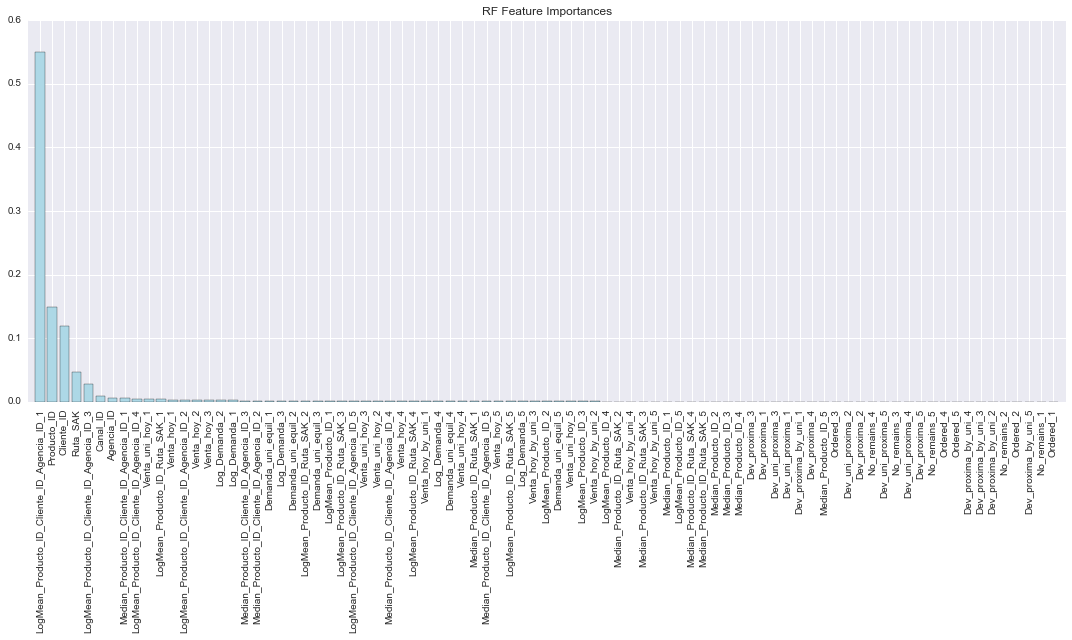

[-0.4255033  -0.22568162 -0.19119118 -0.19332718 -0.25035735] 0.235455740482


[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.6s remaining:   -0.1s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.6s remaining:   -0.1s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.6s finished


In [37]:
plot_feature_importances(rf, X_train.columns)
r2 = rf.score(X_train.fillna(-999), 
        y_train)

rmse = np.sqrt((1-r2)*y_train.var())
print (scores, rmse)

## For 11 week prediction

In [38]:
X_train2 = X_train[[col for col in X_train.columns if '_1' != col[-2:]]]
X_eval2 = X_eval[[col for col in X_eval.columns if '_1' != col[-2:]]]
X_train2.shape, X_train.shape

((809684, 69), (809684, 85))

In [39]:
rf2 = RandomForestRegressor(n_estimators=3, criterion='mse', n_jobs=-1, verbose=10)

scores = cross_val_score(rf2, X_train2.fillna(-999), 
                         y_train,
                scoring = 'mean_squared_error', cv = cv5fold, n_jobs=-1)
rf2.fit(X_train2.fillna(-999), y_train)

 building tree 2 of 3
building tree 1 of 3
 building tree 3 of 3
building tree 1 of 3
 building tree 3 of 3
 building tree 2 of 3
building tree 1 of 3
 building tree 2 of 3
 building tree 3 of 3
building tree 1 of 3
 building tree 2 of 3
 building tree 3 of 3


[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.2min remaining:  -18.3s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.2min remaining:  -18.4s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.2min remaining:  -17.7s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.3min remaining:  -19.4s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.3min remaining:  -19.4s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.3s remaining:   -0.1s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.3s remaining:   -0.1s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.1s remaining:   -0.0s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.1s remaining:   -0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.2min r

 building tree 2 of 3
building tree 1 of 3
 building tree 3 of 3


[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:   24.1s remaining:   -6.0s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:   24.2s remaining:   -6.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.2s finished
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.1s remaining:   -0.0s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.1s remaining:   -0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s finished


building tree 1 of 3building tree 2 of 3

building tree 3 of 3


[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:   36.3s remaining:   -9.1s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:   37.3s remaining:   -9.3s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=3, n_jobs=-1, oob_score=False, random_state=None,
           verbose=10, warm_start=False)

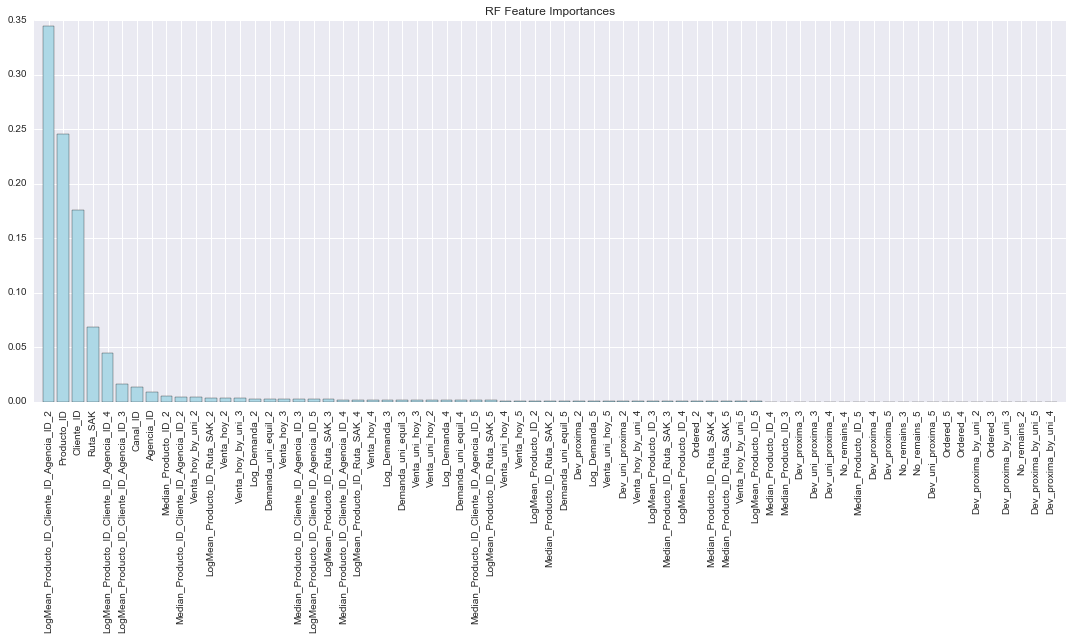

[-0.39228947 -0.29017993 -0.22747028 -0.22683749 -0.3233319 ] 0.271559533439


[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.5s remaining:   -0.1s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.5s remaining:   -0.1s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.5s finished


In [40]:
plot_feature_importances(rf2, X_train2.columns)
r2 = rf2.score(X_train2.fillna(-999), 
        y_train)

rmse = np.sqrt((1-r2)*y_train.var())
print (scores, rmse)

# Generating submission file

In [41]:
X_eval.head()

Agencia_ID  Canal_ID  Cliente_ID  Producto_ID  Ruta_SAK  \
Semana                                                                
11     42         1378         1      594640        43285      2005   
10     59         1359        11     2068213         6469      3957   
       129        1378         1      905734        37577      2101   
11     183        1340         1      325592        43285      2065   
       203        1340         1     7729188        43274      2052   

            Venta_uni_hoy_1  Venta_hoy_1  Dev_uni_proxima_1  Dev_proxima_1  \
Semana                                                                       
11     42               NaN          NaN                NaN            NaN   
10     59               3.0        42.78                0.0            0.0   
       129              NaN          NaN                NaN            NaN   
11     183              NaN          NaN                NaN            NaN   
       203              NaN          NaN                NaN            NaN   

            Demanda_uni_equil_1                     ...                       \
Semana                                              ...                        
11     42                   NaN                     ...                        
10     59                   3.0                     ...                        
       129                  NaN                     ...                        
11     183                  NaN                     ...                        
       203                  NaN                     ...                        

            No_remains_5  Venta_hoy_by_uni_5  Ordered_5  Log_Demanda_5  \
Semana                                                                   
11     42            0.0                5.28        1.0       3.433987   
10     59            NaN                 NaN        NaN            NaN   
       129           NaN                 NaN        NaN            NaN   
11     183           0.0                5.28        1.0       2.772589   
       203           NaN                 NaN        NaN            NaN   

            Median_Producto_ID_5  LogMean_Producto_ID_5  \
Semana                                                    
11     42                   10.0               2.482432   
10     59                    NaN                    NaN   
       129                   NaN                    NaN   
11     183                  10.0               2.482432   
       203                   NaN                    NaN   

            Median_Producto_ID_Ruta_SAK_5  LogMean_Producto_ID_Ruta_SAK_5  \
Semana                                                                      
11     42                            10.0                        2.315569   
10     59                             NaN                             NaN   
       129                            NaN                             NaN   
11     183                           12.0                        2.563761   
       203                            NaN                             NaN   

            Median_Producto_ID_Cliente_ID_Agencia_ID_5  \
Semana                                                   
11     42                                         30.0   
10     59                                          NaN   
       129                                         NaN   
11     183                                        12.0   
       203                                         NaN   

            LogMean_Producto_ID_Cliente_ID_Agencia_ID_5  
Semana                                                   
11     42                                      3.383733  
10     59                                           NaN  
       129                                          NaN  
11     183                                     2.541049  
       203                                          NaN  

[5 rows x 85 columns]

In [42]:
y_eval10 = pd.Series(rf.predict(X_eval.loc[10, :].fillna(-999)), index=X_eval.loc[10, :].index)
y_eval11 = pd.Series(rf2.predict(X_eval2.loc[11, :].fillna(-999)), index=X_eval2.loc[11, :].index)
y_eval = pd.concat([y_eval10, y_eval11], axis=0).to_frame('Log_Demanda')
y_eval.describe()

[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.2s remaining:   -0.0s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.2s remaining:   -0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.0s remaining:   -0.0s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.1s remaining:   -0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s finished


,Log_Demanda
count,78819.000000
mean,1.622351
std,0.788216
min,0.000000
25%,1.098612
50%,1.460676
75%,2.029682
max,6.775471


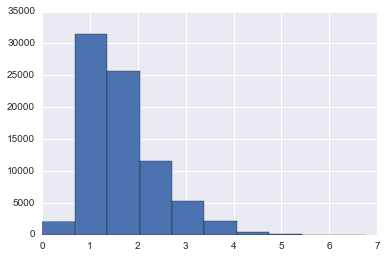

In [43]:
y_eval.Log_Demanda.hist()

In [80]:
os.makedirs('Predictions')
os.makedirs('Predictions/release_v01')

In [81]:
y_eval.to_csv('Predictions/release_v01/Prediction_%s_v01.csv' % 'NAYARIT')